<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
##from sklearn_extra.cluster import KMedoids

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [6]:
print(df.describe(include='all'))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

In [7]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# Step 4: Display PairPlot

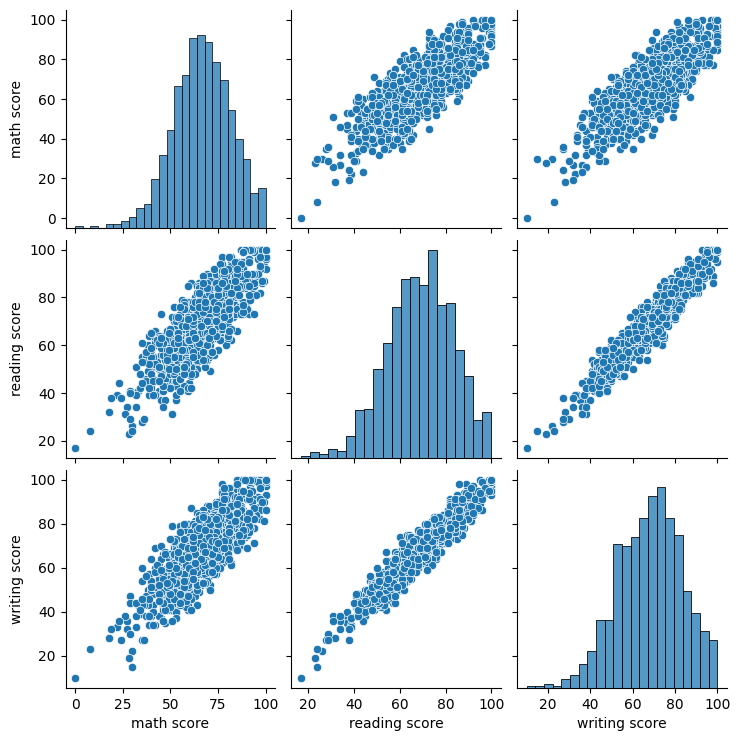

In [8]:
sns.pairplot(df)
plt.show()

# Step 5: Correlation heatmap

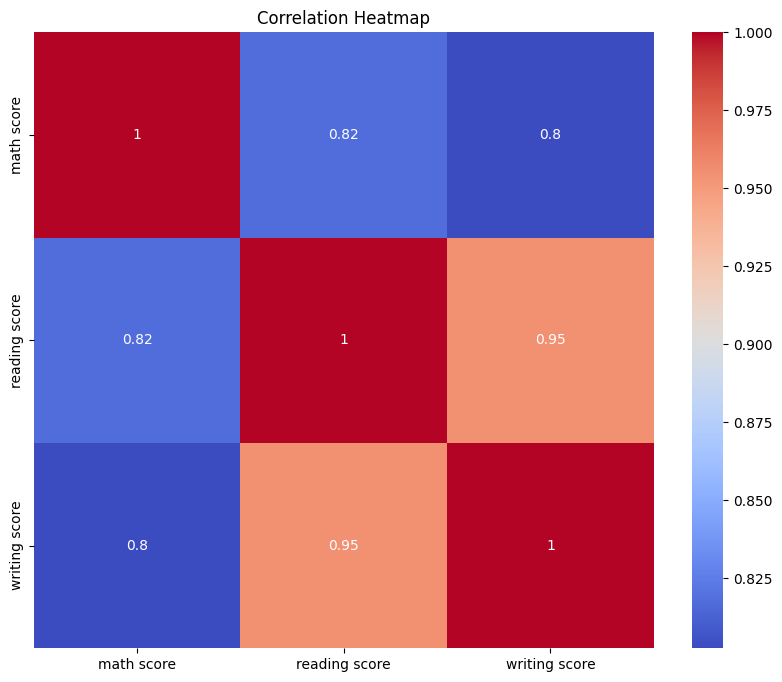

In [9]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Distribution of numerical features

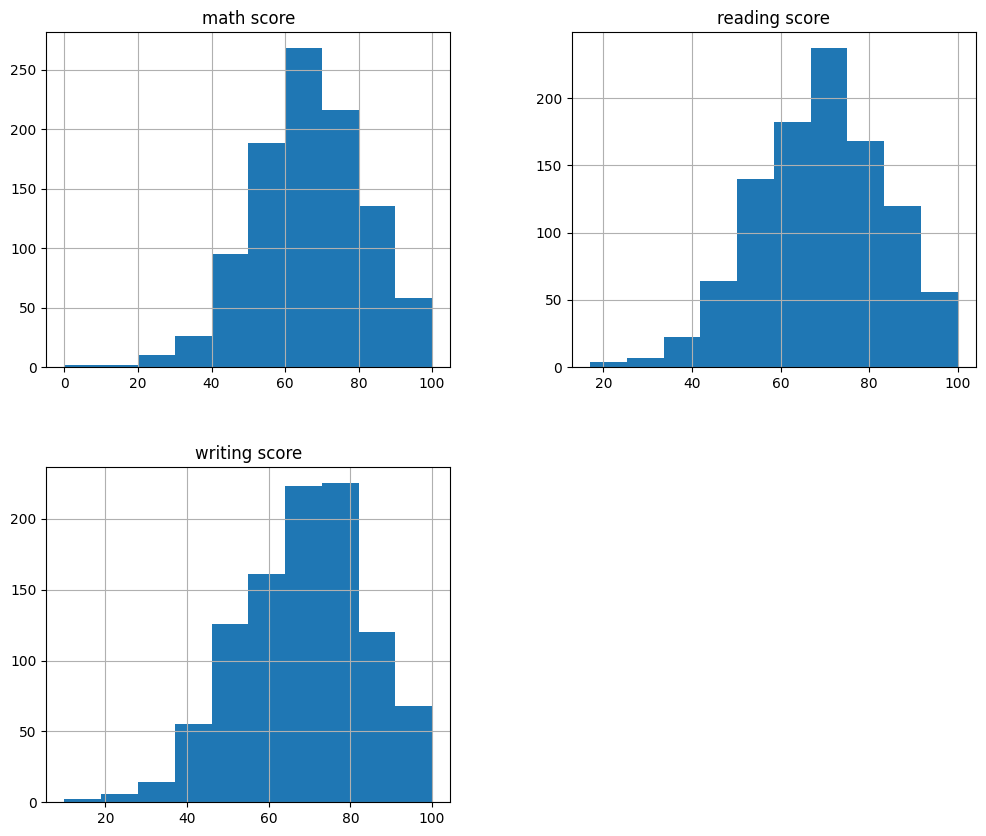

In [10]:
df.hist(figsize=(12,10))
plt.show()

# Step 7: Apply StandardScaler

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Step 8: Elbow method to find optimal k

Text(0, 0.5, 'Sum of Squared Errors (SSE)')

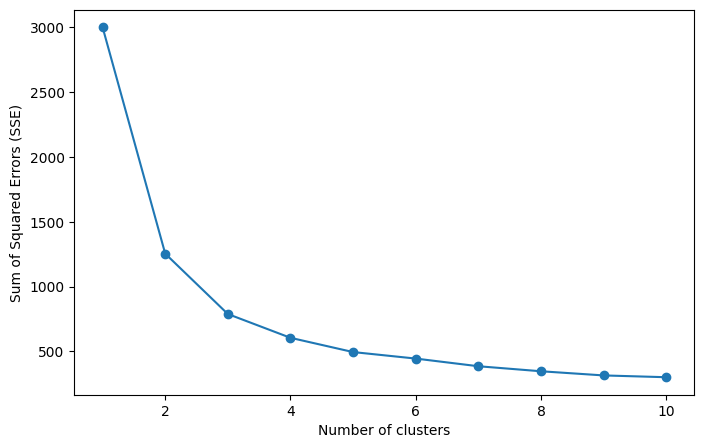

In [12]:
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Step 10: Print Cluster Center

In [14]:
kmeans.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

# Step 11: Plot Cluster

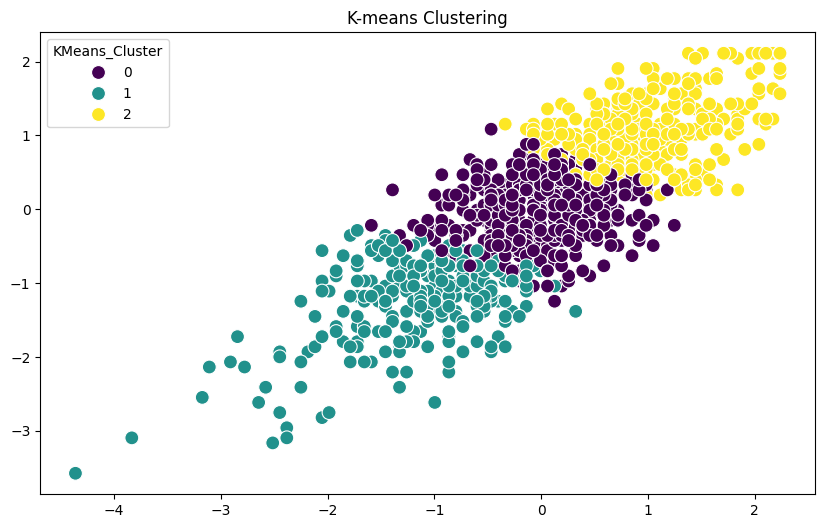

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.title('K-means Clustering')
plt.show()

# Step 12:Analyze clusters 

In [16]:
gdf = df.groupby("KMeans_Cluster")

In [17]:
for index,data in gdf:
    print(data.mean(numeric_only=True))
    print(data.min(), data.max())
    print("-" * 10)

math score        65.338600
reading score     68.458239
writing score     67.821670
KMeans_Cluster     0.000000
dtype: float64
gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                     42
reading score                                  51
writing score                                  50
KMeans_Cluster                                  0
dtype: object gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                   85
reading score                                85
writing score                                82
KMeans_Cluster           

# Step 13: Perform K-Medoids

In [ ]:
kmediods = KMedoids(n_clusters=2, random_state=42)
df['KMedoids_Cluster'] = kmediods.fit_predict(scaled_features)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=df['KMedoids_Cluster'], palette='viridis', s=100)
plt.title('K-medoids Clustering')
plt.show()

# Step:14 Comparison of K-means and K-medoids Clusters

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=df['KMedoids_Cluster'], palette='viridis', s=100)
plt.title('K-medoids Clustering')
plt.show()

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

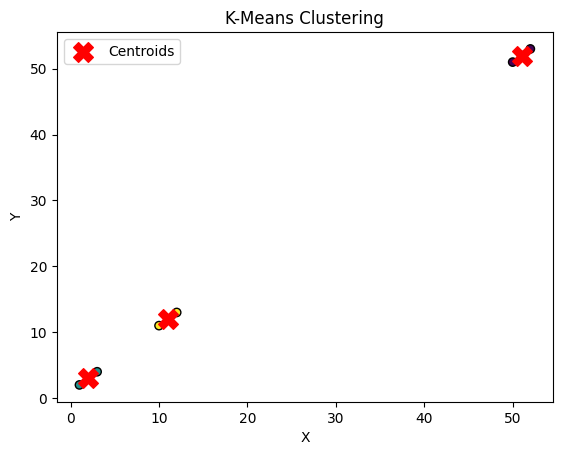

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data points
data = np.array([ [1, 2], [2, 3], [3, 4], 
                 [10, 11], [11, 12], [12, 13], 
                 [50, 51], [51, 52], [52, 53] ])

# Number of clusters
k = 3

# Initialize centroids randomly from the data points
np.random.seed(42)
centroids = data[np.random.choice(len(data), k, replace=False)]

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-Means clustering algorithm
def kmeans(data, centroids, k, max_iters=100):
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        
        # Assign points to the nearest centroid
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        
        # Compute new centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

# Run K-Means algorithm
clusters, centroids = kmeans(data, centroids, k)

# Convert cluster data to plot format
labels = np.zeros(len(data))
for cluster_idx, cluster in enumerate(clusters):
    for point in cluster:
        labels[np.where((data == point).all(axis=1))[0][0]] = cluster_idx

# Plotting the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

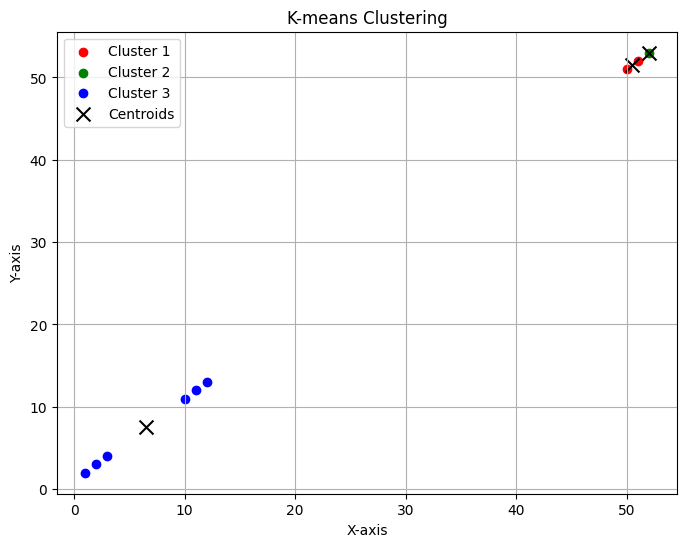

In [26]:
import random
import matplotlib.pyplot as plt

# Sample data points
data = [[1, 2], [2, 3], [3, 4], [10, 11], [11, 12], [12, 13], [50, 51], [51, 52], [52, 53]]

k = 3  # Number of clusters

centroids, clusters = k_means(data, k)

# Plotting
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Colors for clusters (extend if k > 7)

plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    cluster_x = [point[0] for point in cluster]
    cluster_y = [point[1] for point in cluster]
    plt.scatter(cluster_x, cluster_y, c=colors[i % len(colors)], label=f"Cluster {i+1}") # Use modulo for color cycling

centroid_x = [centroid[0] for centroid in centroids]
centroid_y = [centroid[1] for centroid in centroids]
plt.scatter(centroid_x, centroid_y, c='black', marker='x', s=100, label="Centroids") # Mark centroids clearly

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("K-means Clustering")
plt.legend()
plt.grid(True)
plt.show()